# Exploratory Data Analysis - Titanic Dataset

Exploratory data analysis is probably the most important component of any science. While exploring datasets for this assignment, I stumbled upon the Titanic Dataset. I lived in Southampton, UK and worked at a research facility that was housed just next to the berth from where Titanic set sail on April 10, 1912. This data presents both a nostalgia and inspiration to learn, and draw statistical inferences about an amazing ship and its passengers.

In [1]:
# Import libraries required for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder)

In [2]:
# Reading titanic dataset
data = pd.read_csv('titanic-data.csv', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Dataset
Titanic dataset is available as a CSV file with 891 entries across 12 features. Each of the features describe:
<br>Passenger ID - numerical value showing sequence number of entry
<br>Survived - Status of passenger survival (0 = No; 1 = Yes)
<br>Pclass   - Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
<br>Name     - Name of passenger
<br>Sex      - Sex
<br>Age      - Age
<br>SibSp    - Number of siblings / Spouses aboard
<br>Parch    - Number of Parents / Children aboard
<br>Ticket   - Ticket number
<br>Fare     - Passenger fare in GBP (British pound)
<br>Cabin    - Cabin
<br>Embarked - Port of embarkation (C - Cherbourg, Q - Queenstown, S - Southampton)
<br>
<br> Data types in the dataset includes two float64 features, five int64 features, and five object features
<br> The non-null counts show that the data is mostly complete with 3 exceptions: Age is missing 105 entries/observations, Cabin is missing 204 entries, and Embarked is missing 2 entries

## Initial Exploration

<AxesSubplot:xlabel='Survived', ylabel='count'>

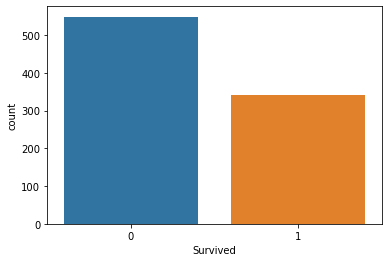

In [5]:
# Check range of Survived
sns.countplot(x='Survived', data=data)

In [6]:
# Get stats for all numeric data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The idea behind using this dataset is to explore the possibility of predicting the survivability of a passenger given the other parameters. In this context this will be the target for a machine learning model. Since this will be the target, the first step was to check the range of values of Survived. This field can only take binary values (yes or no). The countplot indeed shows this to be true.
<br>
<br> Other observations:
<br> PassengerID is just a numerical value in the range of 1 to 891
<br> Passenger Class is also within the range of the data
<br> Data includes a range of people from toddlers (min age 0.42) and older passengers (max 80). This suggests that the data is representative of the entire range and would be a valuable tool.
<br>
<br> After basic stats of numeric data, the next step is to convert objects to numeric values so it can be used in modeling, investigate features that may or may not be relevant for modeling, feature engineering including ideas for investigating data with null values, clean the data, and scale data for modeling

## Feature Engineering and Data Cleaning
### Initial Clean

In [7]:
# Clean data of features that are not useful for modeling
df1 = data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


As described above, PassengerId is just a numeric value in the range of 1 to 891. This index is irrelevant for modeling.
<br> Passenger Name is also not relevant feature it could not have possibility influenced their survivability
<br> Cabin was dropped because it has a significantly large number of null values. This could be a valuable feature as the position of a cabin could influence access to escape routes or life boats. However, given that 77% of this information is missing, any form of data engineering would just be creating artifical data that can significant skew the machine learning model.
<br> Similarly, ticket number would not also have an impact of survivability

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Impute Embarked Data

In [9]:
# Imputing Data
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df1['Embarked'].fillna('S', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Embarked could have an influence on survivability. Since we do not have any knowledge on the criteria used by crew to assign cabins. We can assume that the port of embarkation might have an impact on survivability considering that the cabins within a particular class were assigned sequentially from front to back or vice-versa. So the 2 missing values were filled with port of Southampton because it was the boarding point where most passengers embarked.

### Impute Age

       Survived        Age
Parch                     
0      0.343658  32.178503
1      0.550847  24.422000
2      0.500000  17.216912
3      0.600000  33.200000
4      0.000000  44.500000
5      0.200000  39.200000
6      0.000000  43.000000


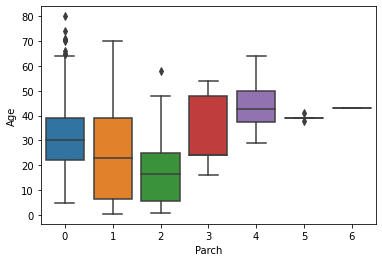

In [11]:
# Box plots
sns.boxplot(x='Parch', y='Age', data=df1)
print(df1.groupby(df1['Parch'])[['Survived', 'Age']].mean())

Age is missing about 20% of the data. Although this is large, it is not advisable to remove age as it can have a very significant impact of survivability. For example, older people might struggle to get to the exists. Similarly, the bigger the family size, lower is the chance since it might take longer to rally up the family together towards exists.
<br>
<br>Parch variable indicates the number of Parents / Children aboard. The above boxplot and statistics is a good metric. This shows that people with fewer parents / children aboard are more likely to survive. Missing ages can be replaced with mean age based on Parch. Although this is not perfect, it is a good approximation. 

In [12]:
# Function for age
def ageimpute(val):
    age   = val[0]
    parch = val[1]
    
    # dictionary with mean ages
    # first value is Parch
    # Second is mean age
    impage = {0: 32., 1: 24., 2: 17., 3: 33., 4: 45., 5: 39., 6: 43.}
    
    if pd.isnull(age):
        return impage[parch]
    
    else:
        return age

In [13]:
# Impute age
df1['Age'] = df1[['Age', 'Parch']].apply(ageimpute, axis=1)

# Check if null values are present
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Convert object to numeric features
#### Convert gender to numeric values using Label Encoder

In [14]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Encode Sex
sex_encoded = LabelEncoder().fit_transform(df1['Sex'])
sex_encoded[:5]

array([1, 0, 0, 0, 1])

In [16]:
# Since 0=female and 1=male
# Rename column
df1 = df1.rename(columns={'Sex': 'male'})

# Fill with encoded values
df1['male'] = sex_encoded
df1.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


#### Convert Embarked to categories using One Hot Encoder

In [17]:
# Encode Embarked labels
embark_encoded = LabelEncoder().fit_transform(df1['Embarked'])
embark_encoded[:10]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [18]:
# Convert numeric values to binary values
embark_1hot = OneHotEncoder(categories='auto').fit_transform(embark_encoded.reshape(-1, 1))

# Convert from sparse matrix to array
embark_1hot = embark_1hot.toarray()
embark_1hot[:3]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [19]:
# convert to dataframe
embark_1hot_df = pd.DataFrame(embark_1hot, columns=['C', 'Q', 'S'])
embark_1hot_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [20]:
# combine data frames and drop Embarked from old dataframe
df2 = pd.concat([df1.drop(['Embarked'], axis=1), embark_1hot_df], axis=1)
print(df2.head())
print(df2.info())

   Survived  Pclass  male   Age  SibSp  Parch     Fare    C    Q    S
0         0       3     1  22.0      1      0   7.2500  0.0  0.0  1.0
1         1       1     0  38.0      1      0  71.2833  1.0  0.0  0.0
2         1       3     0  26.0      0      0   7.9250  0.0  0.0  1.0
3         1       1     0  35.0      1      0  53.1000  0.0  0.0  1.0
4         0       3     1  35.0      0      0   8.0500  0.0  0.0  1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   male      891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    float64
 8   Q         891 non-null    float64
 9   S         891 non-null    float64
dtypes:

## Synthesis
The titanic dataset was analysed and features that do not have relevance to predict the survivability of a passenger were deleted. Furthermore, missing data was imputed in the Age feature as this is likely a very important feature for prediction. Object features that could impact survivability were encoded to binary features that are easy to work with for modeling.
<br> The final dataset 'DF2' is cleaned and prepped for modeling
<br> There is no missing data. Categorical data has also been converted to a usable format

<AxesSubplot:>

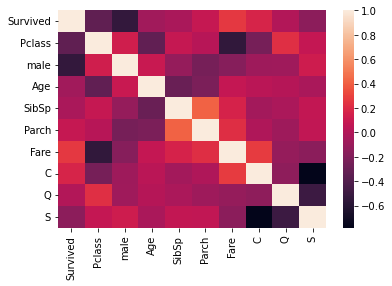

In [21]:
sns.heatmap(df2.corr())

The goal of the modeling would be to predict survivability given other parameters. The top row of the correlation heat map shows how survivability is correlated with other parameters. It can be inferred that Survivability is negatively correlated with male gender. This means that a female is more likely to survive. On the other hand, Fare is slightly positively correlated with survivability. Although this needs to be interpreted with a grain of salt because, Pclass is slightly negatively correlated.

## Hypothesis Testing
Based on the above observations, 3 possible hypotheses can be formulated:
1. Fare that a passenger paid influenced survivability
2. Passenger class did not influence survivability
3. Younger passengers are likely to survive
4. Female passengers are more likely to survive

These are just a few example of hypotheses that can be tested with this dataset. Both 1st and 2nd hypotheses could be similar because higher fare usually means higher class.
<br> As an example of statistical testing, the focus will be on the 2nd hypothesis.
<br>
### Hypothesis
The focus is on survivability based on passenger class

In [22]:
# Create subset for analysis
dfstat = df2[['Pclass', 'Survived']]

# Size of each class
dfstat.groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
# Mean survivability by class
dfstat.groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

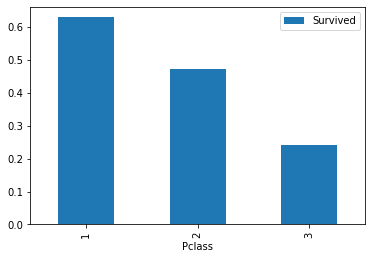

In [24]:
dfstat.groupby('Pclass').mean().plot.bar()

This suggests that first class passengers have higher survivability rate. Therefore this hypothesis can be tested.
#### Formulate Hypothesis
Null Hypothesis: Passenger class did not influence survivability
<br> Alternate Hypothesis: Passenger class did influence survivability
<br>
<br> To test this hypothesis, Z-test will be used.
<br> Z-test is a statistical test that tests the mean of a distribution. Not going into the definition and explanation of the test itself, but rather focusing on the inference.
<br> Here 100 samples of mean survivability are taken for each class. Since minimum population size is 184 for 2nd class, a good approximation for a smaller sample to calculate means is 30.
<br>
<br> Before calculating the statistic, significance level is set at P-value of 0.05
<br> Therefore, if the computed P-value is less than 0.05, then null hypothesis can be rejected.

In [25]:
# Sample sets of mean survivability for each class
Pclass1 = np.array([dfstat['Survived'][dfstat['Pclass']==1].sample(30).mean() for i in range(100)])

Pclass2 = np.array([dfstat['Survived'][dfstat['Pclass']==2].sample(30).mean() for i in range(100)])

Pclass3 = np.array([dfstat['Survived'][dfstat['Pclass']==3].sample(30).mean() for i in range(100)])

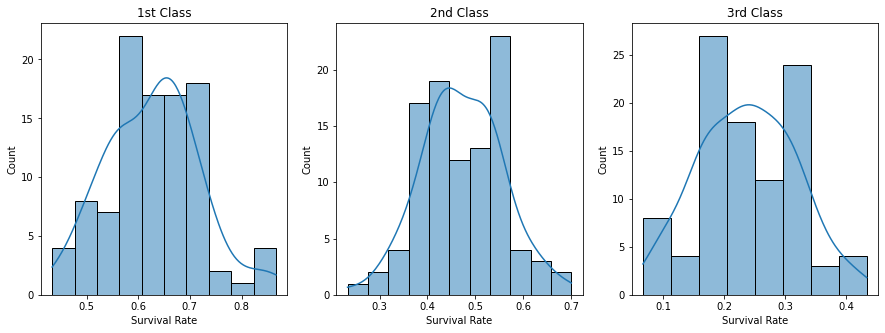

In [26]:
# Based on central limit theorem, this should be approximately normally distributed
Pclass_df = pd.DataFrame(np.array([Pclass1, Pclass2, Pclass3]).T, columns=['Pclass1','Pclass2','Pclass3'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
for dat, ax, title in zip([Pclass1, Pclass2, Pclass3], [ax1, ax2, ax3], ['1st Class', '2nd Class', '3rd Class']):
    sns.histplot(dat, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Survival Rate')

In [27]:
# 1st class and 2nd class
zstat, pvalue = stats.ttest_ind(Pclass1, Pclass2)
print('Classes 1 and 2')
print('Z-Statistic: {}'.format(zstat))
print('P-value: {}'.format(pvalue))

Classes 1 and 2
Z-Statistic: 12.576705693769684
P-value: 4.808365925976798e-27


In [28]:
# 1st class and 3nd class
zstat, pvalue = stats.ttest_ind(Pclass1, Pclass3)
print('Classes 1 and 3')
print('Z-Statistic: {}'.format(zstat))
print('P-value: {}'.format(pvalue))

Classes 1 and 3
Z-Statistic: 32.3916189884874
P-value: 4.589686051660905e-81


In [29]:
# 1st class and 2nd class
zstat, pvalue = stats.ttest_ind(Pclass2, Pclass3)
print('Classes 2 and 3')
print('Z-Statistic: {}'.format(zstat))
print('P-value: {}'.format(pvalue))

Classes 2 and 3
Z-Statistic: 20.24263305538541
P-value: 4.1466232228435705e-50


#### Inference
The statistical analysis can be summarized as below:
<br> Class_1
<br> Z-score:  12.93
<br> P-value: 3.9e-28
<br>
<br> Class_2
<br> Z-score:  33.66
<br> P-value: 7.2e-84
<br>
<br> Class_3
<br> Z-score:  19.79
<br> P-value: 8.4e-49
<br> The Z-score is quite high for all cases, and the P-value is significantly smaller than 0.05 that was set prior to the test.
<br>
<br> Therefore, we can conclude that the null hypothesis can be rejected. This means that in the given dataset, there is significant correlation between the passenger class of travel and their survivability rate. In other words, if we accept the null hypothesis, then the probability of observing that effect by random is very small. A general inference can be made that people in better class had higher survival rate but this does not establish any causation.

## Next Steps and conclusion
More inferences can be deduced by studying different pairs of data. A statistical model can help identify dependent and independent variables in the dataset that could help with further data analysis and building a machine learning model.
<br> The current dataset is of reasonable quality. However, since the data was probabily compiled from paper records, it is likely that there is some human error while inputing the data. Furthermore, this is just a sample dataset and a big assumption is that the data is a relatively true representation of all passengers on Titanic. As per historical records, there were 1317 passengers onboard, and the current data has only 891 records, that is about 67%. A fuller dataset with data that has been validated might be more useful. None the less, the current dataset is still a good starting point for analysis.